In [26]:
from rect2DMap import rect2DMap
from EM import EM
from energyNorms import *
from drawMap import drawMap
import scipy.io as sp

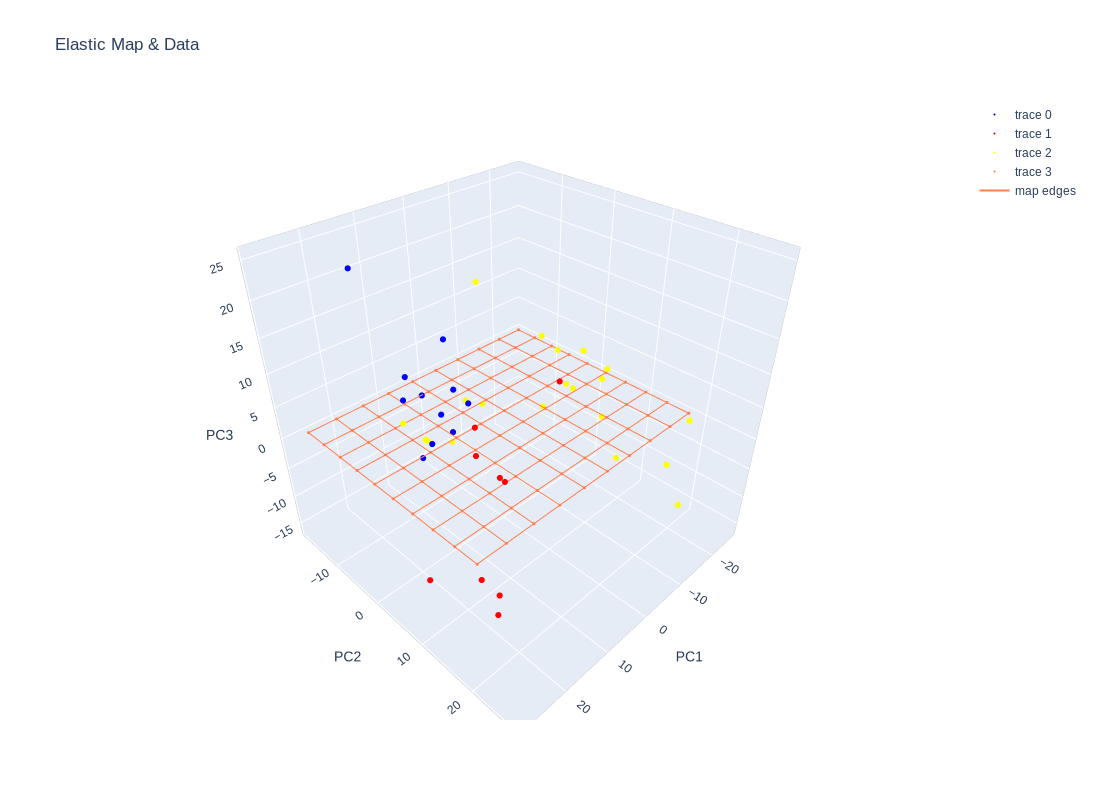

NameError: name 'end' is not defined

In [27]:
d2fn = sp.loadmat('/home/utilisateur/ElMap/tests/bladderCancer.mat')['d2fn'].T
col = sp.loadmat('/home/utilisateur/ElMap/tests/bladderCancer.mat')['col']
colours = ['blue', 'red', 'yellow']

_map = rect2DMap(10, 10)
_map.init(d2fn, 'pci')
drawMap(_map, d2fn, classes= col,markColour=colours,lineWidth= 0.5)
EM(_map, 
    d2fn, 
    constStretching = 0,
    constBending = .1)

EM(_map, 
   d2fn, 
    constStretching = 0,
    constBending = .1, 
    func=L2,
    nInt=2, 
   delta = .75) #intshrinkage
drawMap(_map, d2fn, classes= col,markColour=colours,lineWidth= 0.5)

In [14]:
_map.getMappedCoordinates().shape

(900, 285)

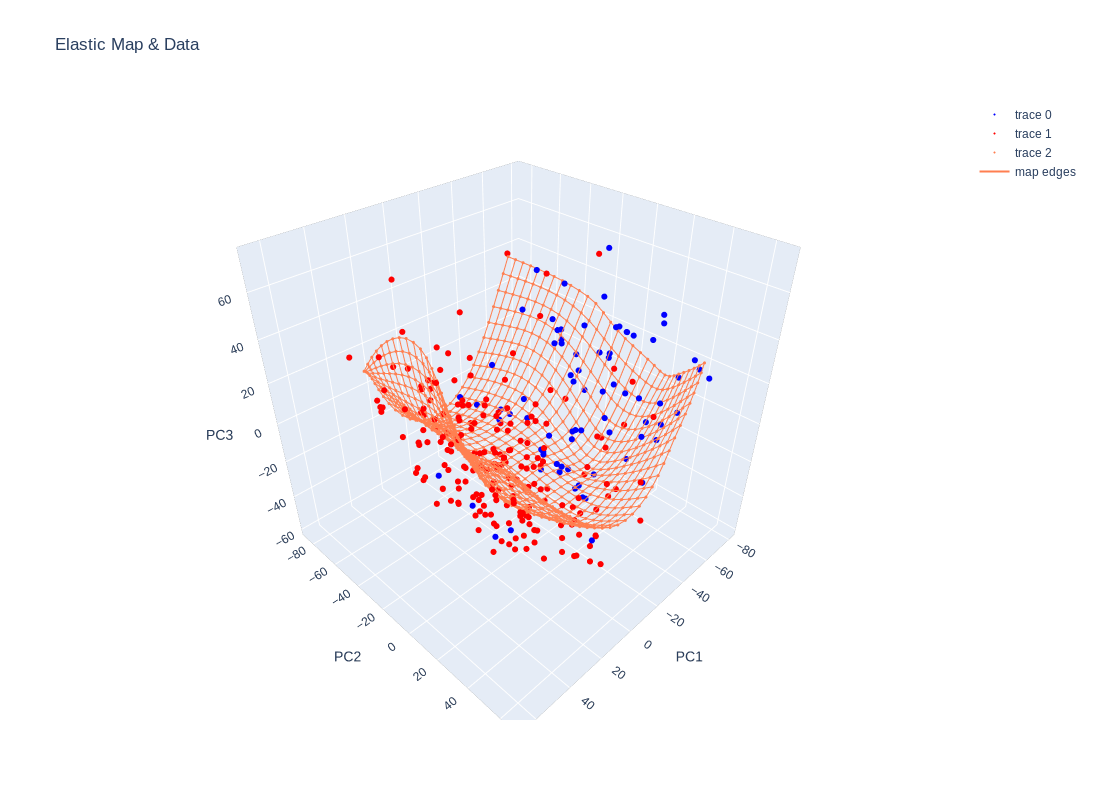

In [20]:
d1n = sp.loadmat('/home/utilisateur/ElMap/tests/breastCancer.mat')['d1n']
col = sp.loadmat('/home/utilisateur/ElMap/tests/breastCancer.mat')['col']
colours = ['blue', 'red']

_map = rect2DMap(30, 30)
_map.init(d1n, 'pci')
EM(_map, 
    d1n, 
    constStretching = 0,
    constBending = .1)
drawMap(_map, d1n, classes= col,markColour=colours,lineWidth= 0.5)

In [2]:
from line_profiler import LineProfiler
d1n = sp.loadmat('/home/utilisateur/ElMap/tests/breastCancer.mat')['d1n']
col = sp.loadmat('/home/utilisateur/ElMap/tests/breastCancer.mat')['col']
colours = ['blue', 'red']

_map = rect2DMap(30, 30)

In [3]:
%load_ext line_profiler

In [4]:
%lprun -f _map.preprocessDataInit -f _map.associate _map.init(d1n,'pci')

Timer unit: 1e-06 s

Total time: 2.78007 s
File: /home/utilisateur/ElMap/MapGeometry.py
Function: preprocessDataInit at line 108

Line #      Hits         Time  Per Hit   % Time  Line Contents
   108                                               def preprocessDataInit(self, data, reduce):
   109                                           
   110                                                   #Perform data preprocessing if necessary (see description of
   111                                                   #'reduce')
   112                                                   #
   113                                                   #Inputs:
   114                                                   #   map is MapGeometry object to initialise map.
   115                                                   #   data is n-by-m matrix with n data points and m coordinates for
   116                                                   #       each point (each row is one data point)
   117        